In [1]:
import os

import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

/home/fmeyer/miniconda3/envs/master/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
datapath = datapath = '/mnt/c/Users/fmeyer/Git/ood-detection/data'
pets_features_path = os.path.join(datapath, "pets_f_test.pt")
pets_targets_path = os.path.join(datapath, "pets_t_test.pt")
dtd_features_path = os.path.join(datapath, "dtd_f_test.pt")
dtd_targets_path = os.path.join(datapath, "dtd_t_test.pt")

In [3]:
pets_features = torch.load(pets_features_path)
pets_targets = torch.load(pets_targets_path)
dtd_features = torch.load(dtd_features_path)
dtd_targets = torch.load(dtd_targets_path)

In [4]:
dtd_features.shape

torch.Size([1880, 1024])

In [5]:
pets_features.shape

torch.Size([1850, 1024])

In [6]:
torch.equal(dtd_features, pets_features)

False

In [7]:
pca = PCA(n_components=2)
pca.fit(pets_features)
pca.fit(dtd_features)
pets_pca = pca.transform(pets_features)
dtd_pca = pca.transform(dtd_features)

In [8]:
pets_pca.shape

(1850, 2)

In [10]:
dtd_pca.shape

(1880, 2)

In [12]:
1880/47

40.0

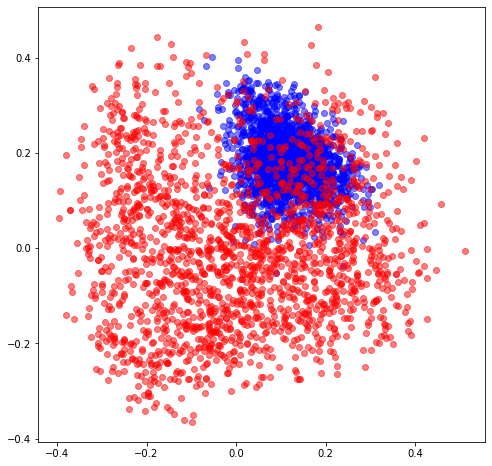

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(pets_pca[:, 0], pets_pca[:, 1], color='blue', alpha=.5, label='ID')
plt.scatter(dtd_pca[:, 0], dtd_pca[:, 1], color='red', alpha=.5, label='OOD')

plt.show()